## Imports

---



In [ ]:
import numpy as np
from math import log,sqrt,exp
from scipy.stats import norm
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## European Call/Put - Analytical Solution

---


In [ ]:
def Analytical_European(r, S, K, T, sigma, type="Call"): 
  
  d1= (np.log(S/K) + (r+sigma**2/2)*T) / (sigma*np.sqrt(T)) 
  d2 = d1 - sigma*np.sqrt(T) 
  
  if type == "Call":
    price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1) 

  elif type == "Put": 
    price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1) 

  return price  

In [ ]:
S_values = [e for e in range(80,140,10)]
for s in S_values:
  print("For S =",s,",the call value, given by the analytical solution, is:",round(Analytical_European(0.05, s, 100, 1, 0.2, "Call"),5))

For S = 80 ,the call value, given by the analytical solution, is: 1.85942
For S = 90 ,the call value, given by the analytical solution, is: 5.09122
For S = 100 ,the call value, given by the analytical solution, is: 10.45058
For S = 110 ,the call value, given by the analytical solution, is: 17.66295
For S = 120 ,the call value, given by the analytical solution, is: 26.16904
For S = 130 ,the call value, given by the analytical solution, is: 35.44027


In [ ]:
S_values = [e for e in range(80,140,10)]
for s in S_values:
  print("For S =",s,",the Put value, given by the analytical solution, is:",round(Analytical_European(0.05, s, 100, 1, 0.2, "Put"),5))

For S = 80 ,the Put value, given by the analytical solution, is: 16.98236
For S = 90 ,the Put value, given by the analytical solution, is: 10.21416
For S = 100 ,the Put value, given by the analytical solution, is: 5.57353
For S = 110 ,the Put value, given by the analytical solution, is: 2.7859
For S = 120 ,the Put value, given by the analytical solution, is: 1.29199
For S = 130 ,the Put value, given by the analytical solution, is: 0.56321


##Explicit Scheme

---


In [ ]:
def Explicit(K,r,sigma,T,smax,dt,ds,type="Call",nature="European"):
    
  t = np.arange(0,T+dt,dt)
  s = np.arange(0,smax+ds,ds)

  C=np.zeros((len(t),len(s)))

  if type == "Call":
    for i in range(len(C)):  #C(t,S=0)
      C[i][0] = 0

    for i in range(len(C)): #C(t,Sf)
      C[i][-1] = smax - K*np.exp(-r*(i)*dt)
      
    for i in range(len(C[0])): #C(t=0,S)
      C[0][i] = np.max(((i)*ds-K,0))

  if type == "Put":
    for i in range(len(C)):  #C(t,S=0)
      C[i][0] = K*np.exp(-r*(i)*dt)

    for i in range(len(C)): #C(t,Sf)
      C[i][-1] = 0
    
    for i in range(len(C[0])): #C(t=0,S)
      C[0][i] = np.max((K-(i)*ds,0))


  for i in range(1,len(C)):
      for j in range(1,len(C[i])-1):
  
        a = 0.5*dt*(sigma**2*(j)**2-(r)*(j))
        b = 1-dt*(sigma**2*(j)**2+r)
        c = 0.5*dt*(sigma**2*(j)**2+(r)*(j))
    
        C[i][j] = a*C[i-1][j-1] + b*C[i-1][j] + c*C[i-1][j+1]
        if nature == "American":
          for j in range(len(C[i])):
            C[i][j] = np.max((C[i][j],C[0][j]))
            if (C[i][j]<C[0][j]):
              print("OLA")
        # print(i)

  return C,s,t

In [ ]:
K = 100
r = 0.05
sigma = 0.2
T = 1
smax = 400

dt=0.00001
ds=0.25

In [ ]:
%%time
C1,s1,t1 = Explicit(K=100,r=0.05,sigma=0.2,T=1,smax=400,dt=0.00001,ds=1,type = "Call", nature = "European")

CPU times: user 2min 8s, sys: 784 ms, total: 2min 8s
Wall time: 2min 14s


In [ ]:
C1.T[100][-1]

10.44812290984219

In [ ]:
%%time
C2,s2,t2 = Explicit(K=100,r=0.05,sigma=0.2,T=1,smax=400,dt=0.00001,ds=0.5,type = "Call", nature = "European")

CPU times: user 3min 54s, sys: 490 ms, total: 3min 54s
Wall time: 3min 55s


In [ ]:
C2.T[200][-1]

10.449976487743942

In [ ]:
%%time
C3,s3,t3 = Explicit(K=100,r=0.05,sigma=0.2,T=1,smax=400,dt=0.00001/2,ds=0.25,type = "Call", nature = "European")

CPU times: user 15min 42s, sys: 1.99 s, total: 15min 44s
Wall time: 15min 47s


In [ ]:
C3.T[400][-1]

10.450434437031314

In [ ]:
%%time
C4,s4,t4 = Explicit(K,r,sigma,T,smax,dt=0.00001,ds=0.5,type = "Put", nature = "European")

CPU times: user 3min 53s, sys: 494 ms, total: 3min 53s
Wall time: 3min 54s


In [ ]:
C4.T[200][-1]

5.572917748778469

In [ ]:
%%time
C5,s5,t5 = Explicit(K,r,sigma,T,smax,dt=0.00001,ds=0.5,type = "Call", nature = "American")


CPU times: user 45min 54s, sys: 494 ms, total: 45min 54s 
 Wall time: 45min 55s


In [ ]:
C5.T[200][-1]

10.450527652171438


In [ ]:
%%time
C6,s6,t6 = Explicit(K,r,sigma,T,smax,dt,ds,type = "Put", nature = "American")

CPU times: user 45min 23s, sys: 494 ms, total: 45min 23s 
 Wall time: 45min 23s


In [ ]:
C6.T[200][-1]

5.79045512613867


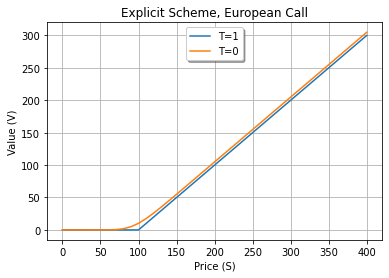

In [ ]:
fig, ax = plt.subplots()
ax.plot(s2, C2[0]) #solution at T=1
ax.plot(s2, C2[len(C1)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme, European Call')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

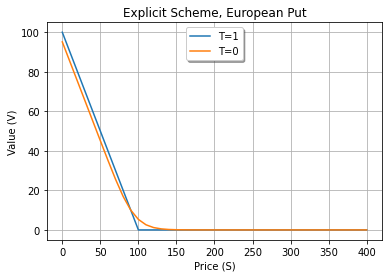

In [ ]:
fig, ax = plt.subplots()
ax.plot(s4, C4[0]) #solution at T=1
ax.plot(s4, C4[len(C4)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme, European Put')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

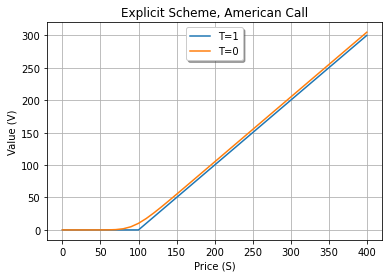

In [ ]:
fig, ax = plt.subplots()
ax.plot(s5, C5[0]) #solution at T=1
ax.plot(s5, C5[len(C5)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme, American Call')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

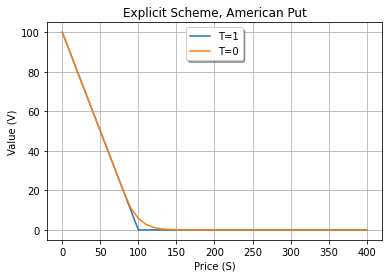

In [ ]:
fig, ax = plt.subplots()
ax.plot(s6, C6[0]) #solution at T=1
ax.plot(s6, C6[len(C6)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme, American Put')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

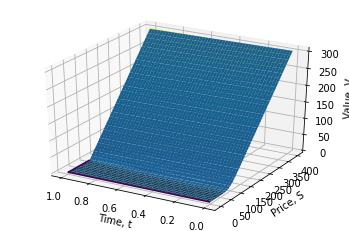

In [ ]:
X, Y = np.meshgrid(t2, s2)
Z = C2.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

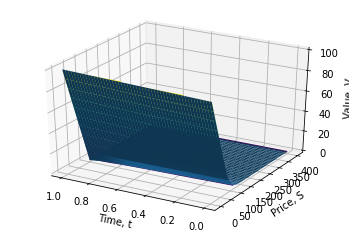

In [ ]:
X, Y = np.meshgrid(t4, s4)
Z = C4.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

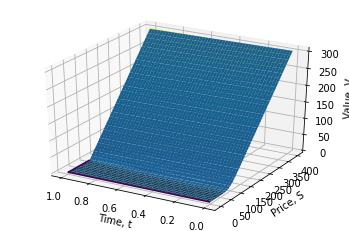

In [ ]:
X, Y = np.meshgrid(t5, s5)
Z = C5.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

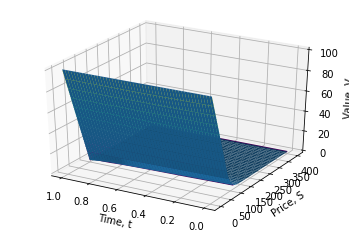

In [ ]:
X, Y = np.meshgrid(t6, s6)
Z = C6.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

##**CN Scheme**

---


In [ ]:
def a(j):
    return (1/4)*dt*(sigma**2*(j)**2-r*(j))
def b(j):
  return -(dt/2)*(sigma**2*(j)**2+r)
def c(j):
  return (1/4)*dt*(sigma**2*(j)**2+r*(j))
  
def CN(K,r,sigma,T,smax,dt,ds,type="Call",nature="European"):

  t = np.arange(0,1+dt,dt)
  s = np.arange(0,smax+ds,ds)

  C=np.zeros((len(t),len(s)))

  if type == "Call":
    for i in range(len(C)):  #C(t,S=0)
      C[i][0] = 0

    for i in range(len(C)): #C(t,Sf)
      C[i][-1] = smax - K*np.exp(-r*(i)*dt)
      
    for i in range(len(C[0])): #C(t=0,S)
      C[0][i] = np.max(((i)*ds-K,0))

  if type == "Put":
    for i in range(len(C)):  #C(t,S=0)
      C[i][0] = K*np.exp(-r*(i)*dt)

    for i in range(len(C)): #C(t,Sf)
      C[i][-1] = 0
    
    for i in range(len(C[0])): #C(t=0,S)
      C[0][i] = np.max((K-(i)*ds,0))


  M = np.zeros((len(s)-2,len(s)-2))
  N = np.zeros((len(s)-2,len(s)-2))


  for i in range(1,len(C)):    
    for j in range(len(M)):
      M[j][j] = 1 - b(j+1)
      
      if j>=0 and j < len(M)-1:
        M[j][j+1] = -c(j+1)

      if j>=1 and j <= len(M)-1:
        M[j][j-1] = -a(j+1)

    for j in range(len(N)):
      N[j][j] = 1 + b(j+1)
      
      if j>=0 and j < len(N)-1:
        N[j][j+1] = c(j+1)

      if j>=1 and j <= len(N)-1:
        N[j][j-1] = a(j+1)

    
    v = np.zeros((len(M[i])))
    v[-1] = C[i][-1]*c(len(s)) + C[i-1][-1]*c(len(s))
    
    C[i][1:-1] = np.linalg.solve(M,N.dot(C[i-1][1:-1])+v)
    
    if nature == "American":
          for j in range(len(C[i])):
            C[i][j] = np.max((C[i][j],C[0][j]))
            if (C[i][j]<C[0][j]):
              print("OLA")

  return C,s,t

In [ ]:
#CN
K = 100
r = 0.05
sigma = 0.2
T = 1
smax = 400

dt = 0.01
ds = 0.5

In [ ]:
%%time
C7,s7,t7 = CN(K,r,sigma,T,smax,dt=0.01,ds=1,type="Call",nature="European")

CPU times: user 1.25 s, sys: 933 ms, total: 2.19 s
Wall time: 1.13 s


In [ ]:
C7.T[100][-1]

10.448137270589982

In [ ]:
%%time
C8,s8,t8 = CN(K,r,sigma,T,smax,dt=0.01,ds=0.5,type="Call",nature="European")

CPU times: user 4.63 s, sys: 2.34 s, total: 6.97 s
Wall time: 3.61 s


In [ ]:
C8.T[200][-1]

10.449990752991873

In [ ]:
%%time
C9,s9,t9 = CN(K,r,sigma,T,smax,dt=0.01,ds=0.25,type="Call",nature="European")

CPU times: user 24.7 s, sys: 5.86 s, total: 30.6 s
Wall time: 16.5 s


In [ ]:
C9.T[400][-1]

10.449578001573409

In [ ]:
%%time
C10,s10,t10 = CN(K,r,sigma,T,smax,dt=0.01,ds=0.5,type="Put",nature="European")

CPU times: user 4.79 s, sys: 2.61 s, total: 7.4 s
Wall time: 5.25 s


In [ ]:
C10.T[200][-1]

5.5729331039591

In [ ]:
%%time
C11,s11,t11 = CN(K,r,sigma,T,smax,dt=0.01,ds=0.5,type="Call",nature="American")

CPU times: user 5.87 s, sys: 3.24 s, total: 9.11 s
Wall time: 5.83 s


In [ ]:
C11.T[200][-1]

10.449990752991873

In [ ]:
%%time
C12,s12,t12 = CN(K,r,sigma,T,smax,dt=0.01,ds=0.5,type="Put",nature="American")

CPU times: user 5.73 s, sys: 3.17 s, total: 8.91 s
Wall time: 4.57 s


In [ ]:
C12.T[200][-1]

6.084235474408309

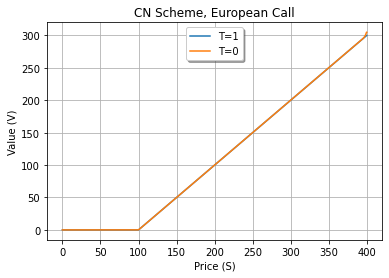

In [ ]:
fig, ax = plt.subplots()
ax.plot(s7, C7[0]) #solution at T=1
ax.plot(s7, C7[len(C7)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('CN Scheme, European Call')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

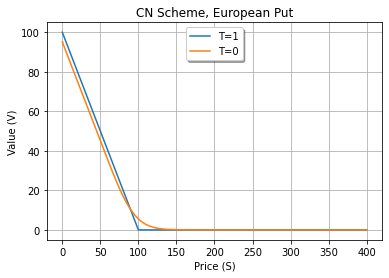

In [ ]:
fig, ax = plt.subplots()
ax.plot(s6, C6[0]) #solution at T=1
ax.plot(s6, C6[len(C6)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('CN Scheme, European Put')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

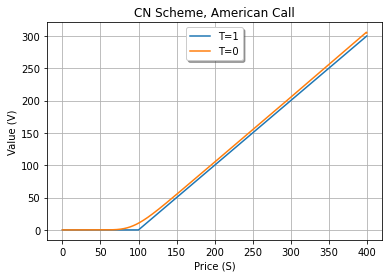

In [ ]:
fig, ax = plt.subplots()
ax.plot(s7, C7[0]) #solution at T=1
ax.plot(s7, C7[len(C7)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('CN Scheme, American Call')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

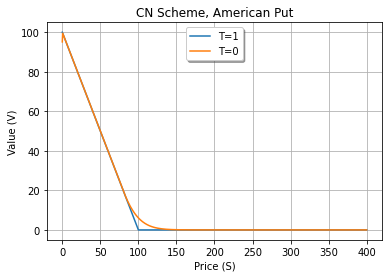

In [ ]:
fig, ax = plt.subplots()
ax.plot(s8, C8[0]) #solution at T=1
ax.plot(s8, C8[len(C8)-1]) #solution at T=0
plt.legend(('T=1', 'T=0'),
           loc='upper center', shadow=True)
plt.title('CN Scheme, American Put')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

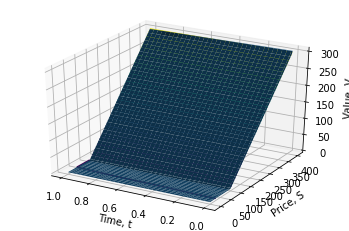

In [ ]:
X, Y = np.meshgrid(t7, s7)
Z = C7.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

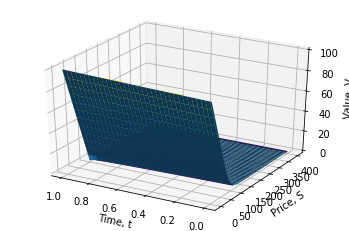

In [ ]:
X, Y = np.meshgrid(t6, s6)
Z = C6.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

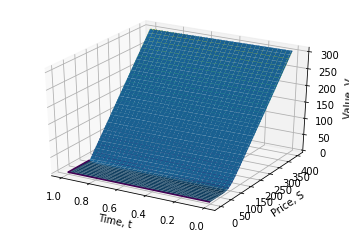

In [ ]:
X, Y = np.meshgrid(t7, s7)
Z = C7.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


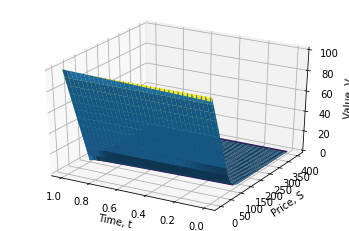

In [ ]:
X, Y = np.meshgrid(t8, s8)
Z = C8.T

X=np.flip(X)

# print(Z.shape,X.shape,Y.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('Time, t')
ax.set_ylabel('Price, S')
ax.set_zlabel('Value, V')
plt.gca().invert_yaxis()

## **Binomial**



---



In [ ]:
def Binomial(K, T, N, S0, r, sigma, metodo = 1, type='Call', nature = "European"):
    dt = T/N
    
    if metodo == 1: #Metodo u=1/d
      A = 0.5*(np.exp(-r*dt)+np.exp((r+sigma**2)*dt))
      d = A-np.sqrt(A**2-1)
      u = 1/d
      p = (np.exp(r*dt) - d) / (u-d)

    if metodo == 2: #Metodo p=0.5
      d = np.exp(r*dt)*(1-sqrt(exp(sigma**2*dt)-1))
      u = np.exp(r*dt)*(1+sqrt(exp(sigma**2*dt)-1))
      p = 0.5

    S = np.zeros(N+1)

    if nature == "European":
      S[0] = np.array(S0*d**N)

      for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    if nature == "American":
      for j in range(0, N+1):
        S[j] = S0 * u**j * d**(N-j)

    C = np.zeros(N+1)    
    if type == "Call":
      for j in range(0,N+1):
        C[j] = max(0, S[j]-K)
    if type == "Put":
      for j in range(0,N+1):
        C[j] = max(0, K-S[j]) 

    if nature == "European":    
      for i in np.arange(N,0,-1):
          for j in range(0,i):
              C[j] = np.exp(-r*dt) * ( p*C[j+1] + (1-p)*C[j])
    
    if nature == "American":
      for i in np.arange(N-1,-1,-1):
              for j in range(0,i+1):
                  S = S0 * u**j * d**(i-j)
                  C[j] = np.exp(-r*dt) * ( p*C[j+1] + (1-p)*C[j] )
                  if type == 'Put':
                      C[j] = max(C[j], K - S)
                  else:
                      C[j] = max(C[j], S - K)

    return C[0]

In [ ]:
%%time
Bin_eu_call1m1 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 1, type = "Call", nature = "European")

CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 14 ms


In [ ]:
%%time
Bin_eu_call2m1 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 1, type = "Call", nature = "European")

CPU times: user 1min 33s, sys: 180 ms, total: 1min 33s
Wall time: 1min 35s


In [ ]:
%%time
Bin_eu_put1m1 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 1, type = "Put", nature = "European")

CPU times: user 16.4 ms, sys: 981 µs, total: 17.4 ms
Wall time: 21.3 ms


In [ ]:
%%time
Bin_eu_put2m1 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 1, type = "Put", nature = "European")

CPU times: user 1min 25s, sys: 151 ms, total: 1min 25s
Wall time: 1min 26s


In [ ]:
%%time
Bin_am_call1m1 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 1, type = "Call", nature = "American")

CPU times: user 23.9 ms, sys: 1.04 ms, total: 25 ms
Wall time: 25.6 ms


In [ ]:
%%time
Bin_am_call2m1 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 1, type = "Call", nature = "American")

CPU times: user 3min 3s, sys: 335 ms, total: 3min 3s
Wall time: 3min 4s


In [ ]:
%%time
Bin_am_put1m1 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 1, type = "Put", nature = "American")

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 20.7 ms


In [ ]:
%%time
Bin_am_put2m1 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 1, type = "Put", nature = "American")

CPU times: user 2min 59s, sys: 327 ms, total: 2min 59s
Wall time: 2min 59s


In [ ]:
print(Bin_eu_call1m1,
Bin_eu_call2m1,
Bin_eu_put1m1,
Bin_eu_put2m1,
Bin_am_call1m1,
Bin_am_call2m1,
Bin_am_put1m1,
Bin_am_put2m1)

10.43544551249808 10.450432069973955 5.5583879625703085 5.573374520032659 10.435445512498049 10.450432069973715 6.08718954693357 6.090343833782173


In [ ]:
print(euro_call,round(100*(1-np.abs(Bin_eu_call1-euro_call)/euro_call),4))
print(euro_call,round(100*(1-np.abs(Bin_eu_call2-euro_call)/euro_call),4))
print(euro_put,round(100*(1-np.abs(Bin_eu_put1-euro_put)/euro_put),4))
print(euro_put,round(100*(1-np.abs(Bin_eu_put2-euro_put)/euro_put),4))

10.450583572185565 99.8551
10.450583572185565 99.9986
5.573526022256971 99.7284
5.573526022256971 99.9973


In [ ]:
%%time
Bin_eu_call1m2 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 2, type = "Call", nature = "European")

CPU times: user 13.9 ms, sys: 0 ns, total: 13.9 ms
Wall time: 15.3 ms


In [ ]:
%%time
Bin_eu_call2m2 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 2, type = "Call", nature = "European")

CPU times: user 1min 28s, sys: 204 ms, total: 1min 28s
Wall time: 1min 31s


In [ ]:
%%time
Bin_eu_put1m2 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 2, type = "Put", nature = "European")

CPU times: user 16.9 ms, sys: 822 µs, total: 17.7 ms
Wall time: 36.6 ms


In [ ]:
%%time
Bin_eu_put2m2 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 2, type = "Put", nature = "European")

CPU times: user 1min 27s, sys: 206 ms, total: 1min 27s
Wall time: 1min 30s


In [ ]:
%%time
Bin_am_call1m2 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 2, type = "Call", nature = "American")

CPU times: user 20.3 ms, sys: 1.01 ms, total: 21.3 ms
Wall time: 21.1 ms


In [ ]:
%%time
Bin_am_call2m2 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 2, type = "Call", nature = "American")

CPU times: user 2min 59s, sys: 413 ms, total: 2min 59s
Wall time: 3min


In [ ]:
%%time
Bin_am_put1m2 = Binomial(100, 1, 100, 100, 0.05, 0.2, metodo = 2, type = "Put", nature = "American")

CPU times: user 24.3 ms, sys: 1.97 ms, total: 26.2 ms
Wall time: 26.8 ms


In [ ]:
%%time
Bin_am_put2m2 = Binomial(100, 1, 10000, 100, 0.05, 0.2, metodo = 2, type = "Put", nature = "American")

CPU times: user 2min 55s, sys: 386 ms, total: 2min 55s
Wall time: 2min 55s


In [ ]:
print(Bin_eu_call1m2,
Bin_eu_call2m2,
Bin_eu_put1m2,
Bin_eu_put2m2,
Bin_am_call1m2,
Bin_am_call2m2,
Bin_am_put1m2,
Bin_am_put2m2)

10.461783694812507 10.450786673660373 5.584726144884332 5.573729123718583 10.461783694812588 10.45078667365989 6.101768855181478 6.0905306831605595


## **Additional Comparissons** (only for European Calls)

--- 



In [ ]:
def getBinomialValuesTimeStepP(P,K, T, N, S0, r, sigma, metodo = 1, type='Call', nature = "European"):
    dt = T/N
    
    if metodo == 1: #Metodo u=1/d
      A = 0.5*(np.exp(-r*dt)+np.exp((r+sigma**2)*dt))
      d = A-np.sqrt(A**2-1)
      u = 1/d
      p = (np.exp(r*dt) - d) / (u-d)

    if metodo == 2: #Metodo p=0.5
      d = np.exp(r*dt)*(1-sqrt(exp(sigma**2*dt)-1))
      u = np.exp(r*dt)*(1+sqrt(exp(sigma**2*dt)-1))
      p = 0.5

    S = np.zeros(N+1)

    if nature == "European":
      S[0] = np.array(S0*d**N)

      for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    if nature == "American":
      for j in range(0, N+1):
        S[j] = S0 * u**j * d**(N-j)

    C = np.zeros(N+1)    
    if type == "Call":
      for j in range(0,N+1):
        C[j] = max(0, S[j]-K)
    if type == "Put":
      for j in range(0,N+1):
        C[j] = max(0, K-S[j]) 

    if nature == "European":    
      for i in np.arange(N,0,-1):
          for j in range(0,i):
              C[j] = np.exp(-r*dt) * ( p*C[j+1] + (1-p)*C[j])
          if i == P:
            res = np.array(C)
            break
    
    if nature == "American":
      for i in np.arange(N-1,-1,-1):
              for j in range(0,i+1):
                  S = S0 * u**j * d**(i-j)
                  C[j] = np.exp(-r*dt) * ( p*C[j+1] + (1-p)*C[j] )
                  if type == 'Put':
                      C[j] = max(C[j], K - S)
                  else:
                      C[j] = max(C[j], S - K)

    return res

In [ ]:
res = getBinomialValuesTimeStepP(P=5000,K=100, T=1, N=10000, S0=100, r=0.05, sigma=0.2, metodo = 1, type='Call', nature = "European")

In [ ]:
S0 = 100
r=0.05
sigma = 0.2
dt = 0.0001
N = 10000

#Metodo u=1/d
A = 0.5*(np.exp(-r*dt)+np.exp((r+sigma**2)*dt))
d = A-np.sqrt(A**2-1)
u = 1/d
p = (np.exp(r*dt) - d) / (u-d)
S = np.zeros(int(N/2))


S[0] = S0*d**(N/2)

for i in range(1,len(S)):
   S[i] = S[i-1]*u/d

In [ ]:
x = S[2411:2584]
y = res[2411:2584]

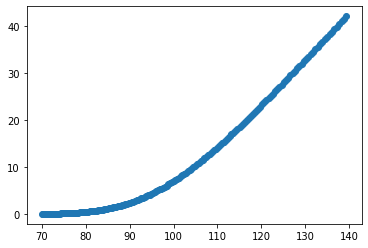

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y,"o") #solution at T=0-5


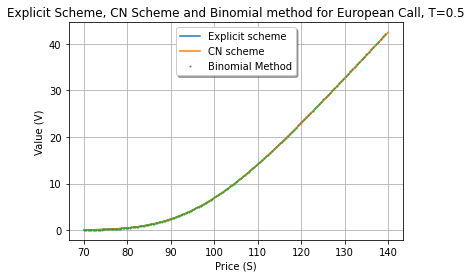

In [ ]:
fig, ax = plt.subplots()
ax.plot(s2[140:280], C2[50000][140:280]) #solution at T=0-5
ax.plot(s7[70:141], C7[50][70:141]) #solution at T=0.5
ax.plot(x, y, "o", markersize = 1)
ax.plot()
plt.legend(('Explicit scheme', 'CN scheme', "Binomial Method"),
           loc='upper center', shadow=True)
plt.title('Explicit Scheme, CN Scheme and Binomial method for European Call, T=0.5')
ax.set(xlabel='Price (S)', ylabel='Value (V)')
ax.grid()

In [ ]:
while True:pass